# Blackjack Card Counting: Hi-Lo System

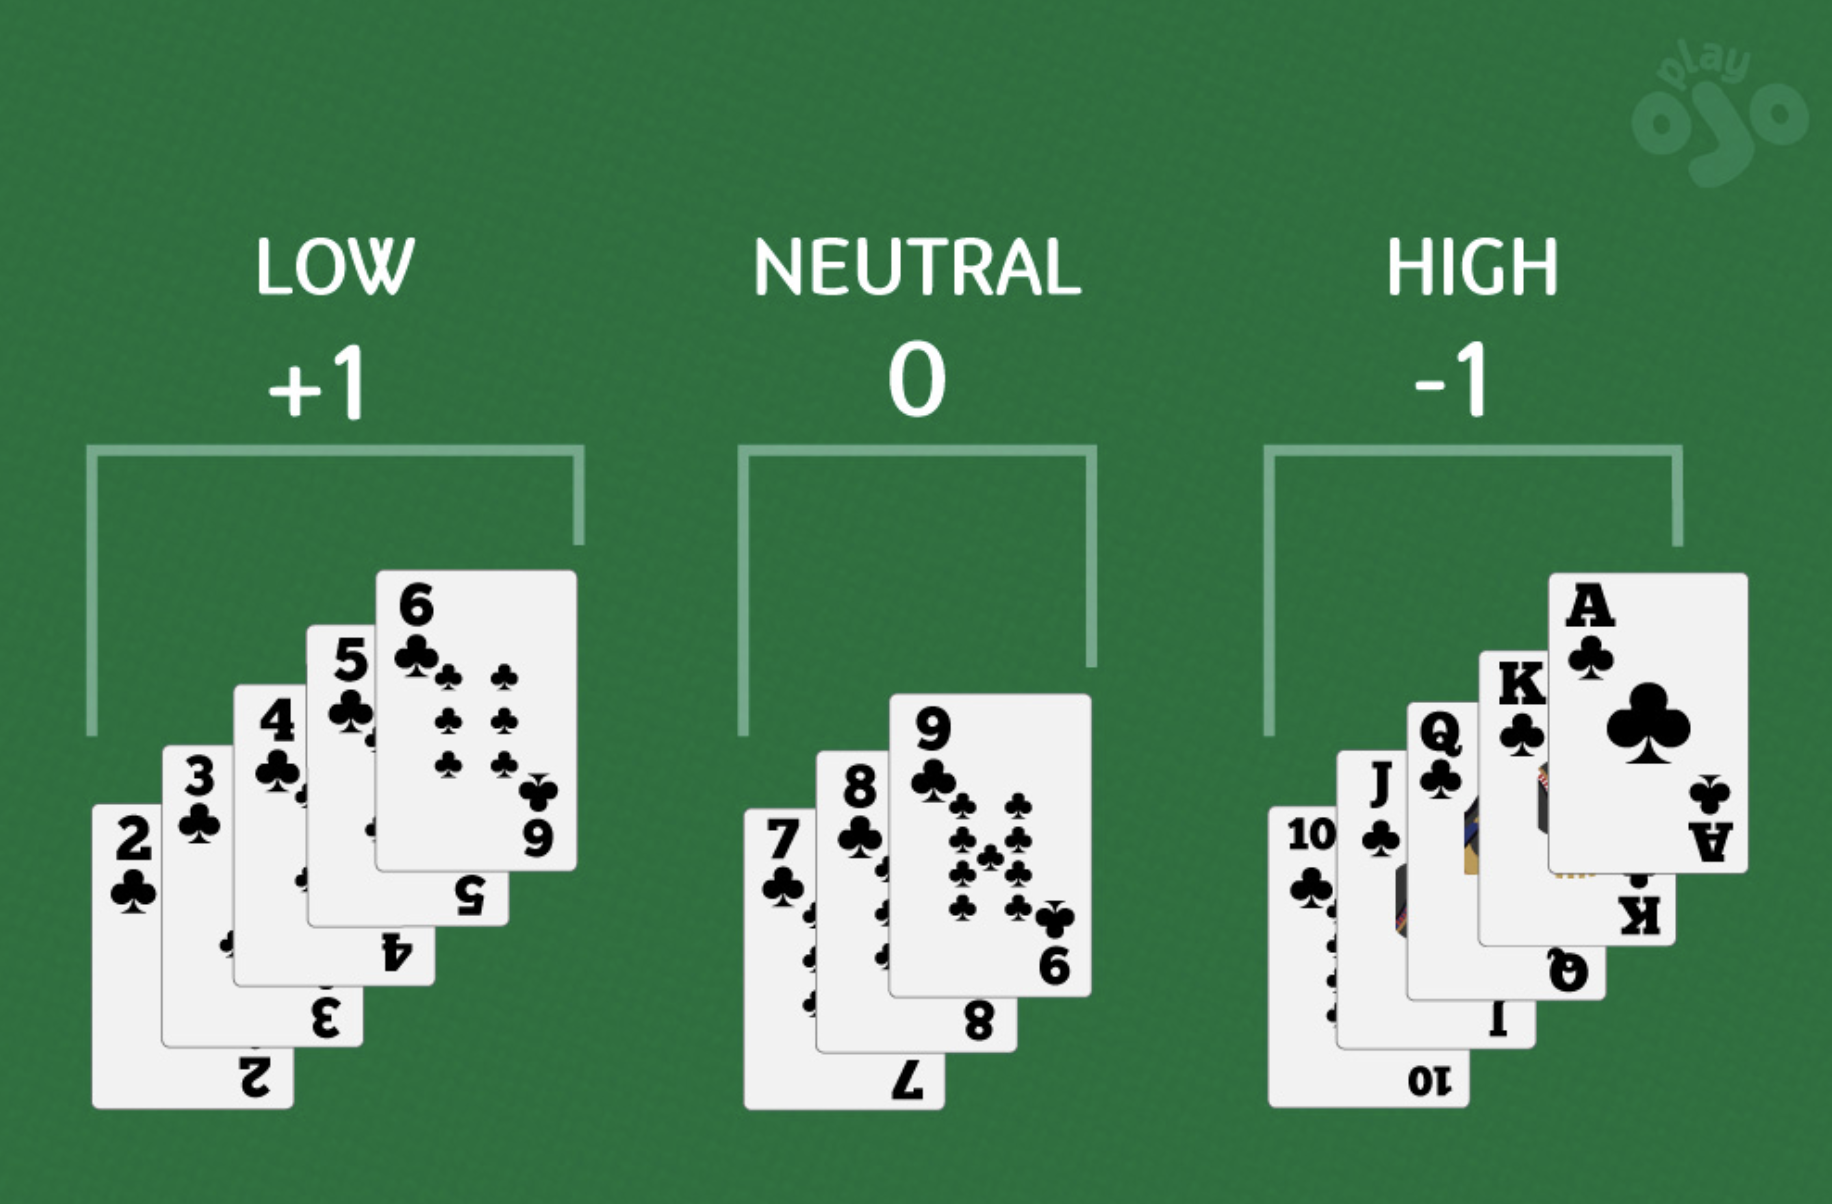

In [1]:
import random

#### Decision graphs as lists:
##### Total lists and inspiration from: https://www.kaggle.com/code/tauffer/blackjack-advanced-techinique-breaking-the-house/notebook
##### H: HIT ; S: STAND ; D: DOUBLE DOWN

In [2]:
# Hard Totals

hard_totals = [ 
    
    # TOP --> Dealer up card
    # SIDE --> Player total with no aces
    
    # 0   1   2   3   4   5   6   7   8   9   10  A
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #0
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #1
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #2
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #3
    [' ',' ','H','H','H','H','H','H','H','H','H','H'], #4
    [' ',' ','H','H','H','H','H','H','H','H','H','H'], #5
    [' ',' ','H','H','H','H','H','H','H','H','H','H'], #6
    [' ',' ','H','H','H','H','H','H','H','H','H','H'], #7
    [' ',' ','H','H','H','H','H','H','H','H','H','H'], #8
    [' ',' ','H','D','D','D','D','H','H','H','H','H'], #9
    [' ',' ','D','D','D','D','D','D','D','D','H','H'], #10
    [' ',' ','D','D','D','D','D','D','D','D','D','D'], #11
    [' ',' ','H','H','S','S','S','H','H','H','H','H'], #12
    [' ',' ','S','S','S','S','S','H','H','H','H','H'], #13
    [' ',' ','S','S','S','S','S','H','H','H','H','H'], #14
    [' ',' ','S','S','S','S','S','H','H','H','H','H'], #15
    [' ',' ','S','S','S','S','S','H','H','H','H','H'], #16
    [' ',' ','S','S','S','S','S','S','S','S','S','S'], #17
    [' ',' ','S','S','S','S','S','S','S','S','S','S'], #18
    [' ',' ','S','S','S','S','S','S','S','S','S','S'], #19
    [' ',' ','S','S','S','S','S','S','S','S','S','S'], #20
    [' ',' ','S','S','S','S','S','S','S','S','S','S'], #21
]    

In [3]:
# Soft Totals

soft_totals = [ 
    
    # TOP --> Dealer up card
    # SIDE --> Player total including an ace
    
    # 0   1   2   3   4   5   6   7   8   9   10  A
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #0
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #1
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #2
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #3
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #4
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #5
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #6
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #7
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #8
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #9
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #10
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #11
    [' ',' ','H','H','H','H','H','H','H','H','H','H'], #12
    [' ',' ','H','H','H','D','D','H','H','H','H','H'], #13
    [' ',' ','H','H','H','D','D','H','H','H','H','H'], #14
    [' ',' ','H','H','D','D','D','H','H','H','H','H'], #15
    [' ',' ','H','H','D','D','D','H','H','H','H','H'], #16
    [' ',' ','H','D','D','D','D','H','H','H','H','H'], #17
    [' ',' ','D','D','D','D','D','S','S','H','H','H'], #18
    [' ',' ','S','S','S','S','D','S','S','S','S','S'], #19
    [' ',' ','S','S','S','S','S','S','S','S','S','S'], #20
    [' ',' ','S','S','S','S','S','S','S','S','S','S'], #21
]   

In [4]:
# Split

splits = [
    
    # TOP --> Dealer's up card
    # Side --> Player splitrable cards
    
    # 0   1   2   3   4   5   6   7   8   9   10  A
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #0
    [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], #1
    [' ',' ','Y','Y','Y','Y','Y','Y','N','N','N','N'], #2
    [' ',' ','Y','Y','Y','Y','Y','Y','N','N','N','N'], #3
    [' ',' ','N','N','N','Y','Y','N','N','N','N','N'], #4
    [' ',' ','N','N','N','N','N','N','N','N','N','N'], #5
    [' ',' ','Y','Y','Y','Y','Y','N','N','N','N','N'], #6
    [' ',' ','Y','Y','Y','Y','Y','Y','N','N','N','N'], #7
    [' ',' ','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y'], #8
    [' ',' ','Y','Y','Y','Y','Y','N','Y','Y','N','N'], #9
    [' ',' ','N','N','N','N','N','N','N','N','N','N'], #10
    [' ',' ','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y'], #11 (A)
]

#### Deck

In [5]:
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
deck = [card for card in ranks] * 4
num_decks = 6
decks = deck * num_decks
random.shuffle(decks)

#### Hand Total Calculator

In [6]:
# Dicitonnary with card values
values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
          'J': 10, 'Q': 10, 'K': 10, 'A': 11}

def get_value(hand):
    value = 0
    aces = 0
    
    for card in hand:
        value += values[card]
        if card == 'A':  # adjustement for soft totals/aces
            aces += 1
        while value > 21 and aces >= 1:
            value -= 10
            aces -= 1
    return value

# def get_value(hand):
#   value = sum(hand)
#   if value > 21 and 11 in hand:
#     value -= 10
#   return value

get_value(['A','A', 'A'])

13

#### Bust Check

In [7]:
def is_bust(hand):
    return True if get_value(hand) > 21 else False

#### Hitting

In [8]:
def hit(hand):
    return hand.append(decks.pop())

#### Doubling Down

In [9]:
def double_down(hand):
    if len(hand) == 2:
        return hand.append(decks.pop())

#### Splitting

In [10]:
def check_split(player_hand, dealer_hand): 
    if player_hand[0] == player_hand[1]: # checking if player can split
        p_card = values[player_hand[0]]
        d_card = values[dealer_hand[0]]
        if splits[p_card][d_card] == 'Y':  # checking if player should split
            return True
        else:
            return False
    else:
        return False

# splitting hand into two
def split_hand(player_hand):
    hand_one = [player_hand[0], decks.pop()]
    hand_two = [player_hand[1], decks.pop()]
    return hand_one, hand_two

# test
if check_split(['10', '10'], ['10', '7']):
    one, two = split_hand(['3', '2'])
    print(one, two)
else:
    print('no')

no


#### Dealer's Gameplay
* Dealer hits on totals below 17
* Dealer stands on totals above 17
* Like the player, any total over 21 is a bust

In [11]:
def d_gameplay(d_hand, p_hand):
    p_value = get_value(p_hand)
    d_value = get_value(d_hand)
    if p_value <= 21:
        while d_value < 17 or (d_value == 17 and 'A' in d_hand):
            d_hand.append(decks.pop())
            d_value = get_value(d_hand)
        if d_value == 17 and 'A' not in d_hand:
            return d_hand, d_value
        if d_value <= 21:
            if d_value < 17:
                d_hand.append(decks.pop())
                d_value = get_value(d_hand)
            if d_value > 21:
                return d_hand, d_value
    return d_hand, d_value

#### Counting the Cards

Dictionary with card counting values in hi-low system

In [12]:
count_values = {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 0, '8': 0, '9': 0, '10': -1, 'J': -1, 'Q': -1, 'K': -1, 'A': -1}


In [13]:
seen_cards = []  # initialize empty list to keep track of seen cards
seen_cards = ['3', '3', '2', '3', '10', '2']  # test
count = 0  # initialize count to 0

def count_cards(cards_list):
    global count
    for card in cards_list:
        count += count_values[card]
    return count

count_cards(seen_cards)
true_count = count / num_decks

seen_cards, count, true_count

(['3', '3', '2', '3', '10', '2'], 4, 0.6666666666666666)

#### Getting Player Action

In [14]:
# decks
decks = deck * num_decks
random.shuffle(decks)

# hands
p_hand = [decks.pop(), decks.pop()]
d_hand = [decks.pop(), decks.pop()]

def p_action(player_hand, dealer_hand):
    if 'A' in player_hand:  # checking if player has an ace --> soft total
#       print(player_hand, dealer_hand)
        action = soft_totals[get_value(player_hand)][values[dealer_hand[0]]]
        return action
    else:                   # no ace --> hard total
#       print(player_hand, dealer_hand)
        action = hard_totals[get_value(player_hand)][values[dealer_hand[0]]]
        return action

#### Creating a List of Hands to Feed Through Play Loop

In [15]:
hand_list = []

# decks
decks = deck * num_decks
random.shuffle(decks)

# hands
p_hand = [decks.pop(), decks.pop()]
d_hand = [decks.pop(), decks.pop()]
p_hand = ['7', 'A']
d_hand = ['5', '6']


if check_split(p_hand, d_hand) == True:
        ph_one, ph_two = split_hand(p_hand)
        hand_list.extend([ph_one, ph_two])
else:
    hand_list.append(p_hand)

print(hand_list)

[['7', 'A']]


#### Betting/Bankroll

* In this case, the bet size will be subtracting 1 from the true count and multiplying it by the inital bet.
* If the true count is below 1, the player will not bet.
* If the inital bet size is $1 and the true count is 4, the bet size will be $3

In [16]:
# initial bet
i_bet = 1

# player's bet
p_bet = i_bet * (true_count - 1) if true_count > 1 else 0

# keeping pnl
pnl = 0

# keeping total amount of wagers
t_w = 0

#### One Hand Game Logic

- Need to get the action that the player will perform based on the previous function.
- Then, execute the action and recalculate the hand total.
- Repeat this until the player stands or busts.

In [17]:
hand_list = [['2', '5'], ['3', '6']]
finished_hands = []
doubled_hands = []

def game_logic(hand_list):
    for player_hand in hand_list:
        while True:
            if is_bust(player_hand) == True:
                finished_hands.append(player_hand)
            else:
                if p_action(player_hand, d_hand) == 'S':
                    finished_hands.append(player_hand)
                elif p_action(player_hand, d_hand) == 'H':
                    hit(player_hand)
                    continue
                elif p_action(player_hand, d_hand) == 'D':
                    double_down(player_hand)
                    doubled_hands.append(player_hand)
                    finished_hands.append(player_hand)
            break

game_logic(hand_list)
print(finished_hands[0], get_value(finished_hands[0]), finished_hands[1], get_value(finished_hands[1]))


d_hand, d_value = d_gameplay(d_hand, p_hand)
print(d_hand, d_value)

['2', '5', 'J'] 17 ['3', '6', '10'] 19
['5', '6', 'Q'] 21


### Comparing the Hands

In [18]:
pnl, t_w, wins, losses, bjs, pushes = 0, 0, 0, 0, 0, 0,

def score_calculator(player_hand_list, d_value, bet_size, doubled_hands):
    global pnl, pnl_for_calc, t_w, wins, losses, bjs, pushes
    for player_hand in player_hand_list:
        if player_hand in doubled_hands:
            p_bet = bet_size * 2
        else:
            p_bet = bet_size
        p_value = get_value(player_hand)
        if p_value > 21:
            pnl -= p_bet
            losses += 1
        elif p_value <= 21 < d_value:
            pnl += p_bet
            wins += 1
        elif p_value == 21 and len(player_hand) == 2 and d_value != 21:
            pnl += p_bet*1.5
            bjs += 1
        elif p_value == 21 and d_value == 21:
            pushes += 1
        elif p_value <= 21 and d_value <= 21:
            if p_value > d_value:
                pnl += p_bet
                wins += 1
            elif p_value < d_value:
                pnl -= p_bet
                losses += 1
            elif p_value == d_value:
                pushes += 1
        t_w += len(player_hand_list) * bet_size
    return pnl, t_w, wins, losses, bjs, pushes


score_calculator(finished_hands, d_value, p_bet, doubled_hands)

(0, 0, 0, 2, 0, 0)

### Putting Everything Together
* Creating the decks
* Getting the hands
* Playing the game loop while keeping track of the count
* Getting the results
* Rerunning for several hands
* Analysing the total PnL/Wagers

In [24]:
pnl = 0
num_games_for_graph = 0
pnl_for_graph = []  # for graphing pnl in the next block
true_count_for_graph = []  # initialize empty list to keep track of true count

In [25]:
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
deck = [card for card in ranks] * 4
num_decks = 6
decks = deck * num_decks
random.shuffle(decks)

t_w, wins, losses, bjs, pushes = 0, 0, 0, 0, 0
p_bet = 1

seen_cards = []  # initialize empty list to keep track of seen cards
count = 0  # initialize count to 0
true_count = 0  # initialize true count to 0

num_games = 300000

for i in range(num_games):

    num_games_for_graph += 1

    if len(decks) < 20:
        decks = [card for card in ranks] * 4 * num_decks
        random.shuffle(decks)
        count = 0 

    p_hand = [decks.pop(), decks.pop()]
    d_hand = [decks.pop(), decks.pop()]

    if check_split(p_hand, d_hand) == True:
        hand_list.extend(split_hand(p_hand))
    else:
        hand_list.append(p_hand)

    game_logic(hand_list)
    d_hand, d_value = d_gameplay(d_hand, p_hand) 
    score_calculator(finished_hands, d_value, p_bet, doubled_hands)
    
    # card counting
    for card in d_hand:
        count += count_values[card]
    for hand in finished_hands:
        for card in hand:
            count += count_values[card]
    true_count = count / (len(decks) / 52)
    true_count_for_graph.append(true_count)
    p_bet = i_bet * (true_count - 1) if true_count > 1 else 0
    # print('True Count:', true_count)
    # print(p_bet)

    hand_list.clear()
    finished_hands.clear()
    pnl_for_graph.append(pnl)


print(f'\nTotal Hands: {wins+losses+bjs+pushes}')
print('Wins:', wins, '| Losses:', losses, '| Blackjacks:', bjs, '| Pushes:', pushes)
print(f'PnL: {pnl:.2f} | ROI: {(pnl/t_w)* 100:.2f}% | Total Wagers: {t_w:.2f}')


Total Hands: 307633
Wins: 122908 | Losses: 148742 | Blackjacks: 8809 | Pushes: 27174
PnL: -79.72 | ROI: -0.03% | Total Wagers: 269093.90


### Graphing the Results

In [26]:
import matplotlib.pyplot as plt

300,000 Games | Casino Edge: 0.03%
Lowest: $-555.03 | Highest: $888.23


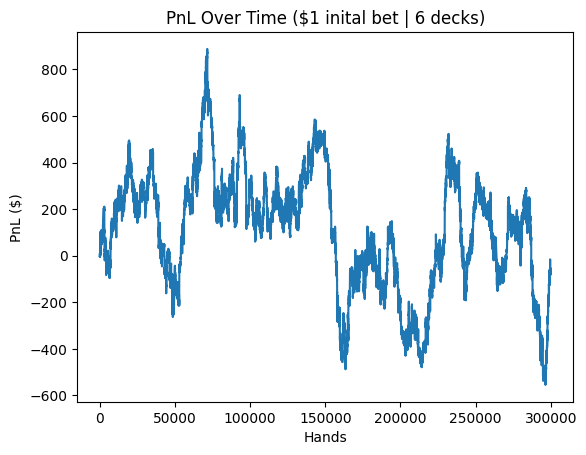

In [27]:
edge = -pnl/t_w * 100

print(f'{len(pnl_for_graph):,} Games | Casino Edge: {edge:.2f}%')
print(f'Lowest: ${min(pnl_for_graph):.2f} | Highest: ${max(pnl_for_graph):.2f}')

plt.plot(pnl_for_graph)
plt.title(f'PnL Over Time ($1 inital bet | {num_decks} decks)')
plt.xlabel('Hands')
plt.ylabel('PnL ($)')
plt.show()

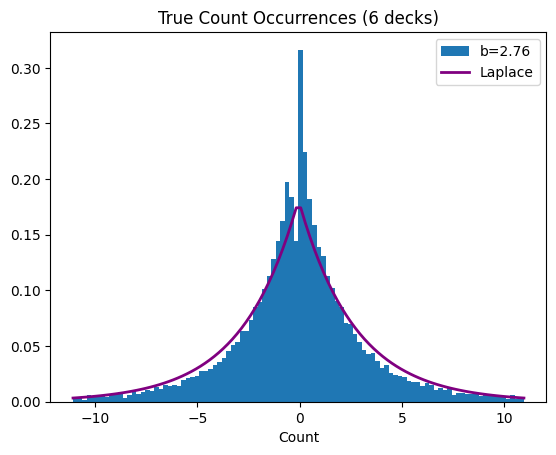

In [28]:
import numpy as np
import scipy.stats as stats

mean = np.mean(true_count_for_graph)
scale = np.std(true_count_for_graph) / np.sqrt(2)

plt.hist(true_count_for_graph, bins=100, density=True, range=(mean - 4*scale, mean + 4*scale), label=f'b={scale:.2f}')
plt.title(f'True Count Occurrences ({num_decks} decks)')
plt.xlabel('Count')

x = np.linspace(mean - 4*scale, mean + 4*scale, 100)
pdf = stats.laplace.pdf(x, loc=mean, scale=scale)
plt.plot(x, pdf, color='purple', linewidth=2, label='Laplace')

plt.legend()
plt.show()
